# __Big Data for Decision Making - Individual Assignment__

__Module code: BNM832__ <br>
__Student ID: 230181766__

__Table of Contents__
1. Business Objective
2. Data Loading
3. Baseline Model
4. Feature Selection based on feature importance
5. Modeling with hypertuning and validation
6. Models comparison
7. Future improvements
8. Conclusion

## 1. Business Objective

The project aims to use machine learning models to assess the severity of accidents that insurance applicants are likely to be involved in. By training these models with UK road safety data of year 2022, the insurance company aims to improve its risk assessment capabilities. This predictive analysis helps the company determine insurance premiums based on individual risk profiles, charging higher premiums for drivers with a higher likelihood of severe accidents. Lower-risk drivers may receive more competitive premium rates, enhancing the company's ability to attract and retain customers. Accurately assessing accident severity also optimizes risk management strategies, identifying trends and patterns in accident data to mitigate risks and allocate resources more effectively. The implementation of machine learning models supports the insurance company's goal of enhancing profitability, maintaining regulatory compliance, and providing superior insurance products and services.

## 2. Data Loading

Importing the necessary libraries

In [147]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

The training data is loaded, this data is output from group assignment after data preprocessing. Accident Severity is considered as the target variable.

In [148]:
# Load the data
df1 = pd.read_csv("trainset_BD.csv")

df1.head()

,age_of_driver,age_band_of_driver,engine_capacity_cc,age_of_vehicle,sex_of_driver_Male,journey_purpose_of_driver_Journey as part of work,journey_purpose_of_driver_Not known,journey_purpose_of_driver_Other,journey_purpose_of_driver_Pupil riding to/from school,journey_purpose_of_driver_Taking pupil to/from school,...,model_SEAT,model_SKODA,model_SUZUKI,model_TOYOTA,model_TRIUMPH,model_VAUXHALL,model_VOLKSWAGEN,model_VOLVO,model_YAMAHA,accident_severity
0,3.784190,2.079442,7.600902,15.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
1,3.761200,2.079442,4.836282,4.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
2,3.178054,1.791759,7.377134,19.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
3,3.135494,1.791759,7.377134,6.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3
4,3.828641,2.079442,7.377134,5.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3


The test data is also loaded.

In [149]:
# Load the data
df2 = pd.read_csv("testset_BD.csv")

df2.head()

,age_of_driver,age_band_of_driver,engine_capacity_cc,age_of_vehicle,sex_of_driver_Male,journey_purpose_of_driver_Journey as part of work,journey_purpose_of_driver_Not known,journey_purpose_of_driver_Other,journey_purpose_of_driver_Pupil riding to/from school,journey_purpose_of_driver_Taking pupil to/from school,...,model_SEAT,model_SKODA,model_SUZUKI,model_TOYOTA,model_TRIUMPH,model_VAUXHALL,model_VOLKSWAGEN,model_VOLVO,model_YAMAHA,accident_severity
0,4.234107,2.397895,7.311886,2.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3
1,4.007333,2.197225,7.287561,3.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
2,3.332205,1.945910,7.493874,14.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2
3,3.367296,1.945910,7.585281,14.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2
4,2.944439,1.609438,7.151485,26.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


The below code shows us that there are 7510 rows and 54 columns in dataset (These 53 columns are obtained after creating dummy variables)

In [150]:
#print the number of rows and columns
print(df1.shape)
print(df2.shape)

(7510, 54)
(1886, 54)


Combining the dataset to used stratified split command

In [151]:
# Combining dataset to perform stratified split
df = pd.concat([df1, df2], axis=0)

In [152]:
df.shape

(9396, 54)

Making sure the indexing is done properly

In [153]:
#reset index
df.reset_index(drop=True, inplace=True)


In [154]:
df

,age_of_driver,age_band_of_driver,engine_capacity_cc,age_of_vehicle,sex_of_driver_Male,journey_purpose_of_driver_Journey as part of work,journey_purpose_of_driver_Not known,journey_purpose_of_driver_Other,journey_purpose_of_driver_Pupil riding to/from school,journey_purpose_of_driver_Taking pupil to/from school,...,model_SEAT,model_SKODA,model_SUZUKI,model_TOYOTA,model_TRIUMPH,model_VAUXHALL,model_VOLKSWAGEN,model_VOLVO,model_YAMAHA,accident_severity
0,3.784190,2.079442,7.600902,15.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
1,3.761200,2.079442,4.836282,4.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
2,3.178054,1.791759,7.377134,19.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
3,3.135494,1.791759,7.377134,6.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3
4,3.828641,2.079442,7.377134,5.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9391,4.025352,2.197225,7.125283,8.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
9392,4.007333,2.197225,8.517193,3.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
9393,3.496508,1.945910,6.396930,8.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2
9394,4.234107,2.397895,7.600402,18.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


StratifiedShuffleSplit is used for splitting datasets into training and testing sets while ensuring that the class distribution is maintained across the splits.This also helps in improving model performance.

Here 80% of data is considered for training and 20% for testing.

In [155]:
# Implement stratified split logic
from sklearn.model_selection import StratifiedShuffleSplit

stratified_splitter= StratifiedShuffleSplit(n_splits=1, test_size=0.2,
                                            random_state=7)

train_index, test_index=list(stratified_splitter.split(df,
                                      df["accident_severity"]))[0]

trainset=df.loc[train_index]
testset=df.loc[test_index]

The below code shows the frquency of each accident severity categories in training and testing data. We could see that the data is splitted with equal frequencies in all categories.

In [156]:
# Count of data of each category in accident severity in train dataset
trainset["accident_severity"].value_counts(normalize=True)

3    0.763970
2    0.214742
1    0.021288
Name: accident_severity, dtype: float64

In [157]:
# Count of data of each category in accident severity in test dataset
testset["accident_severity"].value_counts(normalize=True)

3    0.763830
2    0.214894
1    0.021277
Name: accident_severity, dtype: float64

The "accident_severity" is removed from the training data as it is the target variable and the testing data has only the target variables. The X is for the independent variables (predictors) and y is for the dependent variable (target).

In [158]:
# Deleting Accident_severity(target) from X and assign accident_severity to y
X_train=trainset.drop(columns=["accident_severity"])
y_train=trainset["accident_severity"]
X_test=testset.drop(columns=["accident_severity"])
y_test=testset["accident_severity"]

In [159]:
#Display rows and columns
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7516, 53)
(7516,)
(1880, 53)
(1880,)


## 3. Baseline Model

For Baseline model, Dummy classifier function is used. This method simply predicts the most frequent class in the training data for all instances. It serves as a baseline model to compare the performance of more sophisticated models.



In [160]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score

# Baseline model using dummy classifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
yhat = dummy_clf.predict(X_train)

# Calculating accuracy
Accuracy_b = accuracy_score(y_train, yhat)

# Calculating precision
Precision_b = precision_score(y_train, yhat, average='weighted',
                              zero_division=1)

# Calculating recall
Recall_b = recall_score(y_train, yhat, average='weighted',zero_division=1)

# Calculating F1-score
F1score_b = f1_score(y_train, yhat, average='weighted', zero_division=1)

print("Accuracy:", Accuracy_b)
print("Precision:", Precision_b)
print("Recall:", Recall_b)
print("F1-score:", F1score_b)

Accuracy: 0.7639701969132517
Precision: 0.8196802648584208
Recall: 0.7639701969132517
F1-score: 0.6617463977486636


## 4. Feature Selection based on feature importance

 To identify the most relevant predictors that contribute significantly to the prediction outcome of a model. It helps in understanding the relative importance of different predictors in making accurate predictions.

Various algorithms are employed to identify the most important features contributing to the prediction of accident severity:

*   Random Forest
*   Decision Tree
*   Logistic Regression
*   Adaboost classifier
*   Gradient Boosting Classfier


### Random Forest

In [161]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import pandas as pd


# Creating a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the classifier
rf_classifier.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({
    'Feature': range(len(feature_importances)),
    'Importance': feature_importances})

# Sort DataFrame by importance scores in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance',
                                                          ascending=False)

# Select top 20 features
top_20_features = feature_importance_df.head(20)['Feature'].tolist()

# Convert the list of column indices to column names
selected_feature_names = X_train.columns[top_20_features]

# Select columns from the DataFrame
X_train_rf = X_train[selected_feature_names]
X_test_rf=X_test[selected_feature_names]


print(selected_feature_names)


Index(['age_of_driver', 'age_of_vehicle', 'engine_capacity_cc',
       'age_band_of_driver', 'journey_purpose_of_driver_Not known',
       'driver_home_area_type_Urban area', 'journey_purpose_of_driver_Other',
       'driver_imd_decile_More deprived 40-50%',
       'driver_imd_decile_Less deprived 30-40%',
       'driver_imd_decile_Less deprived 40-50%',
       'driver_imd_decile_Less deprived 20-30%', 'sex_of_driver_Male',
       'driver_imd_decile_More deprived 30-40%',
       'driver_imd_decile_Most deprived 10%',
       'driver_imd_decile_Less deprived 10-20%',
       'driver_imd_decile_More deprived 20-30%', 'model_FORD',
       'model_VOLKSWAGEN', 'driver_home_area_type_Small town',
       'driver_imd_decile_More deprived 10-20%'],
      dtype='object')


The above columns are significantly constributing to the performance of the model. A new dataset X_train_rf and X_test_rf is created by selecting the following columns

In [162]:
X_train_rf.shape
X_test_rf.shape

(1880, 20)

Similarly the feature importance of the predictors are identified for Decision tree, logistic regression, adaboost and gradient boosting which is later used for modelling.

### Decision Trees

In [163]:
from sklearn.tree import DecisionTreeClassifier

# Creating a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Training the classifier
dt_classifier.fit(X_train, y_train)

# Get feature importances
feature_importances_d = dt_classifier.feature_importances_

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({
    'Feature': range(len(feature_importances_d)),
    'Importance': feature_importances_d})

# Sort DataFrame by importance scores in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance',
                                                          ascending=False)

# Select top 20 features
top_20_features_df = feature_importance_df.head(20)['Feature'].tolist()

# Convert the list of column indices to column names
selected_feature_names_df = X_train.columns[top_20_features_df]

# Select columns from the DataFrame
X_train_dt = X_train[selected_feature_names_df]
X_test_dt=X_test[selected_feature_names_df]


print(selected_feature_names_df)


Index(['age_of_driver', 'age_of_vehicle', 'engine_capacity_cc',
       'age_band_of_driver', 'journey_purpose_of_driver_Not known',
       'driver_imd_decile_Less deprived 40-50%',
       'driver_imd_decile_Less deprived 30-40%',
       'driver_imd_decile_More deprived 20-30%',
       'driver_imd_decile_More deprived 30-40%',
       'driver_imd_decile_Most deprived 10%',
       'driver_imd_decile_Less deprived 10-20%',
       'driver_imd_decile_Less deprived 20-30%',
       'driver_imd_decile_More deprived 10-20%', 'model_VOLKSWAGEN',
       'model_FORD', 'driver_imd_decile_More deprived 40-50%',
       'propulsion_code_Petrol', 'model_VAUXHALL',
       'journey_purpose_of_driver_Other', 'model_HONDA'],
      dtype='object')


In [164]:
X_train_dt.shape
X_test_dt.shape

(1880, 20)

### Logistic Regression

In [165]:
from sklearn.linear_model import LogisticRegression
# Creating a Logistic Regression classifier
log_reg_classifier = LogisticRegression(max_iter=1000, random_state=42)

# Training the classifier
log_reg_classifier.fit(X_train, y_train)

# Get coefficients
coefficients = log_reg_classifier.coef_[0]

# Get absolute coefficients and sort
abs_coefficients = np.abs(coefficients)
top_20_indices = np.argsort(abs_coefficients)[::-1][:20]

# Select columns from the DataFrame
X_train_LR = X_train.iloc[:, top_20_indices]
X_test_LR=X_test.iloc[:, top_20_indices]

print(X_train.columns[top_20_indices])

Index(['model_KTM', 'journey_purpose_of_driver_Not known', 'model_VOLVO',
       'model_MAZDA', 'model_SKODA', 'model_LAND', 'model_KAWASAKI',
       'model_YAMAHA', 'model_LEXMOTO', 'model_SEAT', 'model_MITSUBISHI',
       'model_RENAULT', 'sex_of_driver_Male',
       'journey_purpose_of_driver_Taking pupil to/from school', 'model_NISSAN',
       'model_TRIUMPH', 'age_band_of_driver',
       'journey_purpose_of_driver_Journey as part of work',
       'propulsion_code_Petrol', 'journey_purpose_of_driver_Other'],
      dtype='object')


In [166]:
X_train_LR.shape
X_test_LR.shape

(1880, 20)

### Agaboost Classifier

In [167]:
from sklearn.ensemble import AdaBoostClassifier
# Creating a base Decision Tree classifier for AdaBoost
base_classifier = DecisionTreeClassifier(max_depth=1)

# Creating an AdaBoost classifier with the base classifier
adaboost_classifier = AdaBoostClassifier(estimator=base_classifier,
                                         n_estimators=100, random_state=42)

# Training the classifier
adaboost_classifier.fit(X_train, y_train)

# Get feature importances
feature_importances_AB = np.mean([tree.feature_importances_
                    for tree in adaboost_classifier.estimators_],
                                 axis=0)

# Get indices of top 20 features
top_20_indices = np.argsort(feature_importances_AB)[::-1][:20]

# Select columns from the DataFrame
X_train_AB = X_train.iloc[:, top_20_indices]
X_test_AB=X_test.iloc[:, top_20_indices]

print(X_train.columns[top_20_indices])

Index(['age_of_driver', 'engine_capacity_cc', 'age_of_vehicle',
       'journey_purpose_of_driver_Not known', 'sex_of_driver_Male',
       'driver_imd_decile_More deprived 40-50%', 'model_HONDA', 'model_FIAT',
       'model_VOLVO', 'model_BMW', 'driver_home_area_type_Urban area',
       'driver_home_area_type_Small town',
       'driver_imd_decile_Less deprived 10-20%',
       'driver_imd_decile_More deprived 30-40%', 'model_JAGUAR',
       'propulsion_code_Petrol',
       'journey_purpose_of_driver_Taking pupil to/from school',
       'journey_purpose_of_driver_Other',
       'journey_purpose_of_driver_Journey as part of work', 'model_HYUNDAI'],
      dtype='object')


In [168]:
X_train_AB.shape

X_test_AB.shape

(1880, 20)

### Gradient Boosting Classifier

In [169]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import GradientBoostingClassifier

# Creating an Gradient Boost classifier with the base classifier
model = GradientBoostingClassifier(learning_rate=0.05, max_depth=5,
                    n_estimators=500, min_samples_split=5, n_iter_no_change=10)

# Training the classifier
model.fit(X_train, y_train)

# Get feature importances
feature_importance = model.feature_importances_
importance_df = pd.DataFrame({'features': X_train.columns,
                              'importance': feature_importance})
importance_df.sort_values(by='importance', ascending=False, inplace=True)

# Get top 20 features
feature_list = importance_df['features'].head(20).tolist()
print(feature_list)

# Select columns from the DataFrame
X_train_GB = X_train[feature_list]
X_test_GB = X_test[feature_list]


['engine_capacity_cc', 'age_of_driver', 'age_of_vehicle', 'sex_of_driver_Male', 'driver_home_area_type_Urban area', 'model_TRIUMPH', 'journey_purpose_of_driver_Other', 'age_band_of_driver', 'model_YAMAHA', 'model_SUZUKI', 'driver_imd_decile_Less deprived 10-20%', 'propulsion_code_Petrol', 'driver_imd_decile_Most deprived 10%', 'journey_purpose_of_driver_Not known', 'driver_home_area_type_Small town', 'model_KAWASAKI', 'model_FIAT', 'model_RENAULT', 'driver_imd_decile_More deprived 40-50%', 'driver_imd_decile_More deprived 20-30%']


In [170]:
X_train_GB.shape
X_test_GB.shape

(1880, 20)

## 5. Modeling with Hyperparameter tuning and validation

### Random Forest

Grid search CV method is used for implementing hypertuning

In [171]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

# Creating a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define hyperparameters for grid search
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search with cross-validation
grid_search_rf = GridSearchCV(estimator=rf_classifier, param_grid=param_grid_rf,
                              cv=5, scoring='accuracy')
grid_search_rf.fit(X_train_rf, y_train)

# Get the best model from grid search
best_rf_model = grid_search_rf.best_estimator_

#best parameters
best_rf= grid_search_rf.best_params_

# Print the best parameters found by GridSearchCV
print("Best Parameters:", best_rf)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}


Using the identified best parameters the model is again trained and the values are predicted

In [172]:
# Creating a Random Forest classifier with the best parameters
best_rf_classifier = RandomForestClassifier(**best_rf, random_state=42)

# Retraining the classifier on the entire training data
best_rf_classifier.fit(X_train_rf, y_train)

# Evaluate the best model on the training set
y_pred_rf = best_rf_classifier.predict(X_train_rf)


# Calculating accuracy
rf_tr_a = accuracy_score(y_train, y_pred_rf)

# Calculating precision
rf_tr_p = precision_score(y_train, y_pred_rf, average='weighted',
                          zero_division=1)

# Calculating recall
rf_tr_r = recall_score(y_train, y_pred_rf, average='weighted',zero_division=1)

# Calculating F1-score
rf_tr_f1 = f1_score(y_train, y_pred_rf, average='weighted', zero_division=1)

print("Accuracy:", rf_tr_a)
print("Precision:", rf_tr_p)
print("Recall:", rf_tr_r)
print("F1-score:", rf_tr_f1)

Accuracy: 0.8096061734965407
Precision: 0.8433557342352839
Recall: 0.8096061734965407
F1-score: 0.7550539292958172


In [173]:
from sklearn.model_selection import cross_val_score
# Compute cross-validated scores
cv_scores = cross_val_score(best_rf_classifier, X_train_rf, y_train, cv=5,
                            scoring='accuracy')

# Print cross-validated scores
print("Cross-validated Scores:", cv_scores)
print("Mean Cross-validated Accuracy:", cv_scores.mean())


Cross-validated Scores: [0.76795213 0.75981371 0.76380572 0.7671324  0.76314039]
Mean Cross-validated Accuracy: 0.7643688686456873


The cross validated score states that Each score corresponds to the accuracy achieved on a different fold of the training data.

The model is evaluated using test data and the performance metrics are calculated.



In [174]:
# Evaluate the best model on the test set
y_pred_rf_t = best_rf_classifier.predict(X_test_rf)

# Calculating accuracy
rf_te_a = accuracy_score(y_test, y_pred_rf_t)

# Calculating precision
rf_te_p = precision_score(y_test, y_pred_rf_t, average='weighted',
                          zero_division=1)

# Calculating recall
rf_te_r = recall_score(y_test, y_pred_rf_t, average='weighted',zero_division=1)

# Calculating F1-score
rf_te_f1 = f1_score(y_test, y_pred_rf_t, average='weighted', zero_division=1)

print("Accuracy:", rf_te_a)
print("Precision:", rf_te_p)
print("Recall:", rf_te_r)
print("F1-score:", rf_te_f1)



Accuracy: 0.7632978723404256
Precision: 0.7095506029340575
Recall: 0.7632978723404256
F1-score: 0.6761963145290876


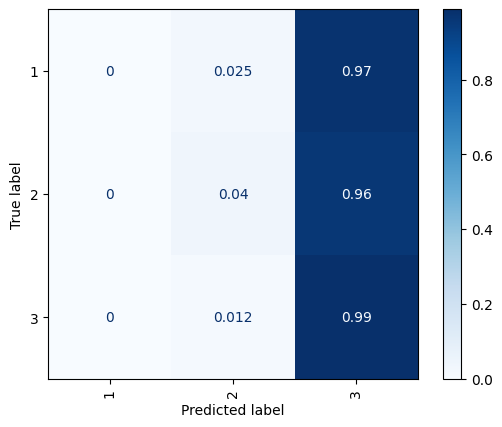

In [175]:
#confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf_t,
                                        labels=best_rf_model.classes_,
                                        xticks_rotation="vertical",
                                        normalize="true",
                                        cmap=plt.cm.Blues)

The model performs well on both training and test datasets, predicting accident severity accurately. Its close alignment indicates robustness and reliability, but a slight drop in performance metrics from training to testing dataset indicates a degree of overfitting.

### Decision Tree

Similar to Random Forest, we defined a grid of hyperparameters for the Decision Tree algorithm, including parameters like the maximum depth of the tree (max_depth), the minimum number of samples required to split a node (min_samples_split). The best parameters are found.

In [176]:
from sklearn.tree import DecisionTreeClassifier

# Creating a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Define hyperparameters for grid search
param_grid_dt = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search with cross-validation
grid_search_dt = GridSearchCV(estimator=dt_classifier, param_grid=param_grid_dt,
                              cv=5, scoring='accuracy')
grid_search_dt.fit(X_train_dt, y_train)

# Get the best model from grid search
best_dt_model = grid_search_dt.best_estimator_

# Best parameters
best_dt= grid_search_dt.best_params_

# Print the best parameters found by GridSearchCV
print("Best Parameters:", best_dt)

Best Parameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}


Again training the model with best parameter.

In [177]:
# Creating a Decision tree classifier with the best parameters
best_dt_classifier = DecisionTreeClassifier(**best_dt, random_state=42)

# Retraining the classifier on the entire training data
best_dt_classifier.fit(X_train_dt, y_train)

# Evaluate the best model on the test set
y_pred_dt = best_dt_classifier.predict(X_train_dt)

# Calculating accuracy
dt_tr_a = accuracy_score(y_train, y_pred_dt)

# Calculating precision
dt_tr_p = precision_score(y_train, y_pred_dt, average='weighted',
                          zero_division=1)

# Calculating recall
dt_tr_r = recall_score(y_train, y_pred_dt, average='weighted',zero_division=1)

# Calculating F1-score
dt_tr_f1 = f1_score(y_train, y_pred_dt, average='weighted', zero_division=1)

print("Accuracy:", dt_tr_a)
print("Precision:", dt_tr_p)
print("Recall:", dt_tr_r)
print("F1-score:", dt_tr_f1)


Accuracy: 0.7700904736562001
Precision: 0.7262005883511501
Recall: 0.7700904736562001
F1-score: 0.6965124132387877


In [178]:
from sklearn.model_selection import cross_val_score
# Compute cross-validated scores
cv_scores = cross_val_score(best_dt_classifier, X_train_dt, y_train,
                            cv=5, scoring='accuracy')

# Print cross-validated scores
print("Cross-validated Scores:", cv_scores)
print("Mean Cross-validated Accuracy:", cv_scores.mean())


Cross-validated Scores: [0.75664894 0.75848303 0.75582169 0.7671324  0.76047904]
Mean Cross-validated Accuracy: 0.7597130207669767


The model is evaluated using test data and the performance metrics are calculated.



In [179]:
# Evaluate the best model on the test set
y_pred_dt_t = best_dt_classifier.predict(X_test_dt)

# Calculating accuracy
dt_te_a = accuracy_score(y_test, y_pred_dt_t)

# Calculating precision
dt_te_p = precision_score(y_test, y_pred_dt_t, average='weighted',
                          zero_division=1)

# Calculating recall
dt_te_r = recall_score(y_test, y_pred_dt_t, average='weighted',zero_division=1)

# Calculating F1-score
dt_te_f1 = f1_score(y_test, y_pred_dt_t, average='weighted', zero_division=1)

print("Accuracy:", dt_te_a)
print("Precision:", dt_te_p)
print("Recall:", dt_te_r)
print("F1-score:", dt_te_f1)

Accuracy: 0.7632978723404256
Precision: 0.6896154039011181
Recall: 0.7632978723404256
F1-score: 0.6880554813606333


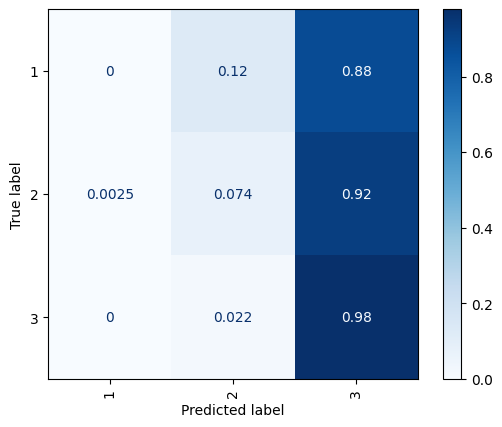

In [180]:
#confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_dt_t,
                                        labels=best_dt_model.classes_,
                                        xticks_rotation="vertical",
                                        normalize="true",
                                        cmap=plt.cm.Blues)

The similar performance metrics on both the training and test datasets suggest that the model generalizes well to test data. However, the precision and F1-score on the test data are slightly lower compared to the training data, suggesting a potential for slight overfitting

### Logistics Regression

In [181]:
# Creating a Logistic Regression classifier
lr_classifier = LogisticRegression(max_iter=1000,random_state=42)

# Define hyperparameters for grid search
param_grid_lr = {
    'penalty': [None],
}

# Perform grid search with cross-validation
grid_search_lr = GridSearchCV(estimator=lr_classifier, param_grid=param_grid_lr,
                              cv=5, scoring='accuracy',error_score='raise')
grid_search_lr.fit(X_train_LR, y_train)

# Get the best model from grid search
best_lr_model = grid_search_lr.best_estimator_

# Best parameters
best_lr= grid_search_lr.best_params_

# Print the best parameters found by GridSearchCV
print("Best Parameters:", best_lr)

Best Parameters: {'penalty': None}


Model is again trained with the best parameters obtained.

In [182]:
# Creating a Logistic Regression classifier with the best parameters
best_lr_classifier = LogisticRegression(max_iter=1000, **best_lr,
                                        random_state=42)

# Retraining the classifier on the entire training data
best_lr_classifier.fit(X_train_LR, y_train)

# Evaluate the best model on the test set
y_pred_lr = best_lr_classifier.predict(X_train_LR)

# Calculating accuracy
lr_tr_a = accuracy_score(y_train, y_pred_lr)

# Calculating precision
lr_tr_p = precision_score(y_train, y_pred_lr, average='weighted',
                          zero_division=1)

# Calculating recall
lr_tr_r = recall_score(y_train, y_pred_lr, average='weighted',zero_division=1)

# Calculating F1-score
lr_tr_f1 = f1_score(y_train, y_pred_lr, average='weighted', zero_division=1)

print("Accuracy:", lr_tr_a)
print("Precision:", lr_tr_p)
print("Recall:", lr_tr_r)
print("F1-score:", lr_tr_f1)

Accuracy: 0.7649015433741352
Precision: 0.7234651627661123
Recall: 0.7649015433741352
F1-score: 0.6700252537931214


In [183]:
from sklearn.model_selection import cross_val_score
# Compute cross-validated scores
cv_scores = cross_val_score(best_lr_classifier, X_train_LR, y_train, cv=5,
                            scoring='accuracy')

# Print cross-validated scores
print("Cross-validated Scores:", cv_scores)
print("Mean Cross-validated Accuracy:", cv_scores.mean())


Cross-validated Scores: [0.76396277 0.76247505 0.76247505 0.76580173 0.7671324 ]
Mean Cross-validated Accuracy: 0.7643693994988746


The model is evaluated using test data and the performance metrics are calculated.



In [184]:
# Evaluate the best model on the test set
y_pred_lr_t = best_lr_classifier.predict(X_test_LR)

# Calculating accuracy
lr_te_a = accuracy_score(y_test, y_pred_lr_t)

# Calculating precision
lr_te_p = precision_score(y_test, y_pred_lr_t, average='weighted',
                          zero_division=1)

# Calculating recall
lr_te_r = recall_score(y_test, y_pred_lr_t, average='weighted',zero_division=1)

# Calculating F1-score
lr_te_f1 = f1_score(y_test, y_pred_lr_t, average='weighted', zero_division=1)

print("Accuracy:", lr_te_a)
print("Precision:", lr_te_p)
print("Recall:", lr_te_r)
print("F1-score:", lr_te_f1)

Accuracy: 0.7627659574468085
Precision: 0.7043665012815093
Recall: 0.7627659574468085
F1-score: 0.6704978985775029


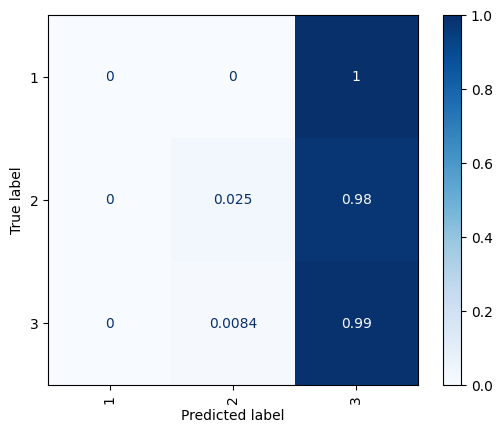

In [185]:
#confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr_t,
                                        labels=best_lr_model.classes_,
                                        xticks_rotation="vertical",
                                        normalize="true",
                                        cmap=plt.cm.Blues)

The logistic regression model shows a fairly consistent performance between the training and test datasets, indicating good generalization. The model's ability to generalize well to test data suggests that it is not overly complex and does not suffer from significant overfitting.

### Adaboost Classifier

In [186]:
# Creating an AdaBoost classifier with Decision tree as base estimator
base_estimator = DecisionTreeClassifier(max_depth=1)
adaboost_classifier = AdaBoostClassifier(estimator=base_estimator,
                                         random_state=42)

# Define hyperparameters for grid search
param_grid_ab = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0]
}

# Perform grid search with cross-validation
grid_search_ab = GridSearchCV(estimator=adaboost_classifier,
                              param_grid=param_grid_ab, cv=5,
                              scoring='accuracy')

grid_search_ab.fit(X_train_AB, y_train)

# Get the best model from grid search
best_adaboost_model = grid_search_ab.best_estimator_

# Best parameters
best_ab= grid_search_ab.best_params_

# Print the best parameters found by GridSearchCV
print("Best Parameters:", best_ab)

Best Parameters: {'learning_rate': 1.0, 'n_estimators': 100}


In [187]:
# Creating a adaboost classifier with the best parameters
base_estimator = DecisionTreeClassifier(max_depth=1)
best_ab_classifier = AdaBoostClassifier(**best_ab, random_state=42,
                                        estimator=base_estimator)

# Retraining the classifier on the entire training data
best_ab_classifier.fit(X_train_AB, y_train)

# Evaluate the best model on the test set
y_pred_ab = best_ab_classifier.predict(X_train_AB)

# Calculating accuracy
ab_tr_a = accuracy_score(y_train, y_pred_ab)

# Calculating precision
ab_tr_p = precision_score(y_train, y_pred_ab, average='weighted',
                          zero_division=1)

# Calculating recall
ab_tr_r = recall_score(y_train, y_pred_ab, average='weighted',zero_division=1)

# Calculating F1-score
ab_tr_f1 = f1_score(y_train, y_pred_ab, average='weighted', zero_division=1)

print("Accuracy:", ab_tr_a)
print("Precision:", ab_tr_p)
print("Recall:", ab_tr_r)
print("F1-score:", ab_tr_f1)

Accuracy: 0.765167642362959
Precision: 0.7159292945620459
Recall: 0.765167642362959
F1-score: 0.6713897464946472


In [188]:
from sklearn.model_selection import cross_val_score
# Compute cross-validated scores
cv_scores = cross_val_score(best_ab_classifier, X_train_AB, y_train, cv=5,
                            scoring='accuracy')

# Print cross-validated scores
print("Cross-validated Scores:", cv_scores)
print("Mean Cross-validated Accuracy:", cv_scores.mean())


Cross-validated Scores: [0.76728723 0.76314039 0.76580173 0.76513639 0.75981371]
Mean Cross-validated Accuracy: 0.7642358899222831


The model is evaluated using test data and the performance metrics are calculated.



In [189]:
# Evaluate the best model on the test set
y_pred_ab_t = best_ab_classifier.predict(X_test_AB)

# Calculating accuracy
ab_te_a = accuracy_score(y_test, y_pred_ab_t)

# Calculating precision
ab_te_p = precision_score(y_test, y_pred_ab_t, average='weighted',
                          zero_division=1)

# Calculating recall
ab_te_r = recall_score(y_test, y_pred_ab_t, average='weighted',zero_division=1)

# Calculating F1-score
ab_te_f1 = f1_score(y_test, y_pred_ab_t, average='weighted', zero_division=1)

print("Accuracy:", ab_te_a)
print("Precision:", ab_te_p)
print("Recall:", ab_te_r)
print("F1-score:", ab_te_f1)

Accuracy: 0.7643617021276595
Precision: 0.7153974155936561
Recall: 0.7643617021276595
F1-score: 0.6742054927817189


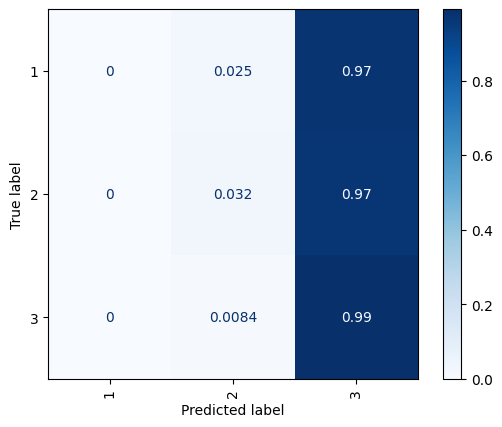

In [190]:
#confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_ab_t,
                                        labels=best_adaboost_model.classes_,
                                        xticks_rotation="vertical",
                                        normalize="true",
                                        cmap=plt.cm.Blues)

The AdaBoost model exhibits robust performance across both training and testing datasets, demonstrating no overfitting. The slight improvement in F1-score from training to testing suggests the model may perform better under test conditions, indicating its applicability to real-world data.

### Gradient Boosting Classifier

In [191]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Creating a Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(random_state=42)

# Define hyperparameters for grid search
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'max_depth': [3, 5, 7]
}

# Perform grid search with cross-validation
grid_search_gb = GridSearchCV(estimator=gb_classifier, param_grid=param_grid_gb,
                              cv=5)
grid_search_gb.fit(X_train_GB, y_train)

# Get the best model from grid search
best_gb_model = grid_search_gb.best_estimator_

# Best Parameters
best_gb= grid_search_gb.best_params_

# Print the best parameters found by GridSearchCV
print("Best Parameters:", best_gb)


Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}


In [192]:
# Creating a Gradient Boosting classifier with the best parameters
best_gb_classifier = GradientBoostingClassifier(**best_gb, random_state=42)

# Retraining the classifier on the entire training data
best_gb_classifier.fit(X_train_GB, y_train)

# Evaluate the best model on the test set
y_pred_gb = best_gb_classifier.predict(X_train_GB)

# Calculating accuracy
gb_tr_a = accuracy_score(y_train, y_pred_gb)

# Calculating precision
gb_tr_p = precision_score(y_train, y_pred_gb, average='weighted',
                          zero_division=1)

# Calculating recall
gb_tr_r = recall_score(y_train, y_pred_gb, average='weighted',zero_division=1)

# Calculating F1-score
gb_tr_f1 = f1_score(y_train, y_pred_gb, average='weighted', zero_division=1)

print("Accuracy:", gb_tr_a)
print("Precision:", gb_tr_p)
print("Recall:", gb_tr_r)
print("F1-score:", gb_tr_f1)

Accuracy: 0.7639701969132517
Precision: 0.8196802648584208
Recall: 0.7639701969132517
F1-score: 0.6617463977486636


In [193]:
from sklearn.model_selection import cross_val_score
# Compute cross-validated scores
cv_scores = cross_val_score(best_gb_classifier, X_train_GB, y_train, cv=5,
                            scoring='accuracy')

# Print cross-validated scores
print("Cross-validated Scores:", cv_scores)
print("Mean Cross-validated Accuracy:", cv_scores.mean())


Cross-validated Scores: [0.76396277 0.76447106 0.76380572 0.76380572 0.76380572]
Mean Cross-validated Accuracy: 0.7639701979020682


The model is evaluated using test data and the performance metrics are calculated.



In [194]:
# Evaluate the best model on the test set
y_pred_gb_t = best_gb_classifier.predict(X_test_GB)

# Calculating accuracy
gb_te_a = accuracy_score(y_test, y_pred_gb_t)

# Calculating precision
gb_te_p = precision_score(y_test, y_pred_gb_t, average='weighted',
                          zero_division=1)

# Calculating recall
gb_te_r = recall_score(y_test, y_pred_gb_t, average='weighted',zero_division=1)

# Calculating F1-score
gb_te_f1 = f1_score(y_test, y_pred_gb_t, average='weighted', zero_division=1)

print("Accuracy:", gb_te_a)
print("Precision:", gb_te_p)
print("Recall:", gb_te_r)
print("F1-score:", gb_te_f1)

Accuracy: 0.7638297872340426
Precision: 0.8196061566319602
Recall: 0.7638297872340426
F1-score: 0.6615558350229704


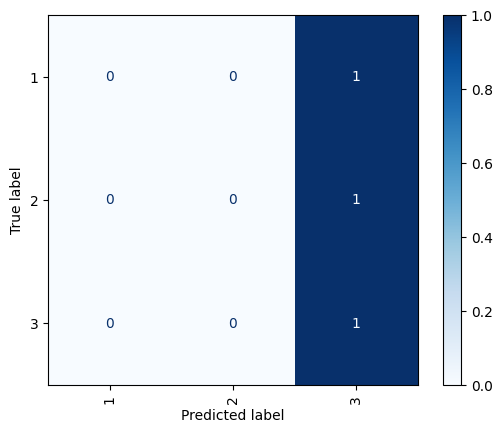

In [195]:
#confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_gb_t,
                                        labels=best_gb_model.classes_,
                                        xticks_rotation="vertical",
                                        normalize="true",
                                        cmap=plt.cm.Blues)

The Gradient Boosting Classifier consistently outperforms both training and test datasets in terms of precision, indicating its ability to predict true positives while minimizing false positives. This is particularly useful in high-cost false positive applications. However, the model's F1-score may bias towards fewer false positive errors, potentially missing some true positives.

## 6. Model Comparison

In [196]:
# Display all Test data performance results
print("Random Forest:")
print("Precision:", rf_te_p)
print("Recall:", rf_te_r)
print("Accuracy:", rf_te_a)
print("F1 Score:", rf_te_f1)

print("Decision Tree:")
print("Precision:", dt_te_p)
print("Recall:", dt_te_r)
print("Accuracy:", dt_te_a)
print("F1 Score:", dt_te_f1)

print("Logistic Regression:")
print("Precision:", lr_te_p)
print("Recall:", lr_te_r)
print("Accuracy:", lr_te_a)
print("F1 Score:", lr_te_f1)

print("Adaboost model:")
print("Precision:", lr_te_p)
print("Recall:", lr_te_r)
print("Accuracy:", lr_te_a)
print("F1 Score:", lr_te_f1)

print("Gradient Boosting model:")
print("Precision:", gb_te_p)
print("Recall:", gb_te_r)
print("Accuracy:", gb_te_a)
print("F1 Score:", gb_te_f1)

Random Forest:
Precision: 0.7095506029340575
Recall: 0.7632978723404256
Accuracy: 0.7632978723404256
F1 Score: 0.6761963145290876
Decision Tree:
Precision: 0.6896154039011181
Recall: 0.7632978723404256
Accuracy: 0.7632978723404256
F1 Score: 0.6880554813606333
Logistic Regression:
Precision: 0.7043665012815093
Recall: 0.7627659574468085
Accuracy: 0.7627659574468085
F1 Score: 0.6704978985775029
Adaboost model:
Precision: 0.7043665012815093
Recall: 0.7627659574468085
Accuracy: 0.7627659574468085
F1 Score: 0.6704978985775029
Gradient Boosting model:
Precision: 0.8196061566319602
Recall: 0.7638297872340426
Accuracy: 0.7638297872340426
F1 Score: 0.6615558350229704


The Gradient Boosting model has the highest precision (81.96%), indicating its best accuracy in ensuring positive predictions. The Random Forest and Logistic Regression models have similar precision, slightly lower than Gradient Boosting. The Decision Tree model has the lowest precision, suggesting it makes more false positive errors. All models have similar recall values, with the Gradient Boosting model slightly better at capturing all positive cases. The overall accuracy of the model is slightly higher than the other models, with the Random Forest, Decision Tree, Logistic Regression, and AdaBoost models sharing identical accuracy scores. The F1 Score, a balance between precision and recall, evaluates the model's performance considering both false positives and false negatives. The Decision Tree model has the highest F1 Score, while the Gradient Boosting model has a lower F1 Score.

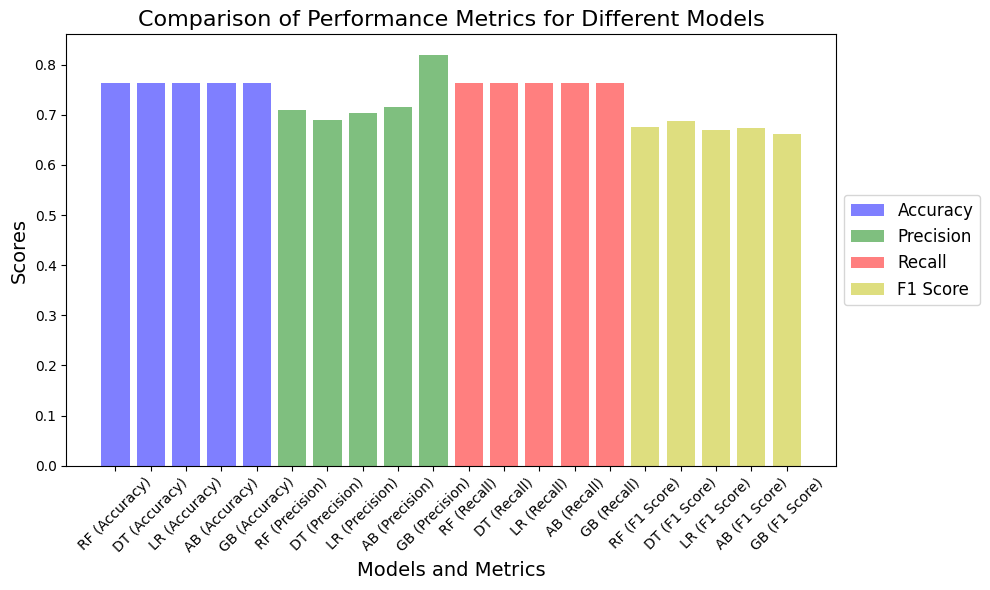

In [197]:
import matplotlib.pyplot as plt

# Results of different models
models = ['RF', 'DT', 'LR', 'AB','GB']
accuracy = [rf_te_a, dt_te_a, lr_te_a, ab_te_a,gb_te_a]
precision = [rf_te_p, dt_te_p, lr_te_p, ab_te_p,gb_te_p]
recall = [rf_te_r, dt_te_r, lr_te_r, ab_te_r,gb_te_r]
f1scores = [rf_te_f1, dt_te_f1, lr_te_f1, ab_te_f1,gb_te_f1]

# Plotting
plt.figure(figsize=(10, 6))

# Plot accuracy
plt.bar([model + " (Accuracy)" for model in models], accuracy,
        color='b', alpha=0.5, label='Accuracy')

# Plot precision
plt.bar([model + " (Precision)" for model in models], precision,
        color='g', alpha=0.5, label='Precision')

# Plot recall
plt.bar([model + " (Recall)" for model in models], recall,
        color='r', alpha=0.5, label='Recall')

# Plot F1 score
plt.bar([model + " (F1 Score)" for model in models], f1scores,
        color='y', alpha=0.5, label='F1 Score')

# Labels and title
plt.xlabel('Models and Metrics', fontsize=14)
plt.ylabel('Scores', fontsize=14)
plt.title('Comparison of Performance Metrics for Different Models', fontsize=16)

plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

# Move legend to the right side
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)

plt.tight_layout()
plt.show()


Gradient Boosting stands out with the highest precision and slightly higher accuracy, making it the best choice in scenarios where it's crucial to minimize false positives and where the overall correctness of predictions is slightly more important.

However, the Decision Tree model shows a good balance between precision and recall, as indicated by its F1 Score, suggesting it could be a strong contender in scenarios where both false positives and false negatives are equally costly.

Despite sharing identical accuracy and recall with some models, AdaBoost and Logistic Regression do not excel in precision or F1 Score compared to Gradient Boosting or the Decision Tree model.

The Gradient Boosting Model is the optimal choice for insurance companies to assess accident risk factors due to its superior precision in identifying high-risk clients and avoiding false positives. Although slightly lower than the Decision Tree model, its precision outweighs the need for a perfect balance between precision and recall.This approach helps in accurately pricing policies for high-risk clients while avoiding overpricing for low-risk individuals, maintaining competitiveness and fairness.

## 7. Future Improvements

To enhance model learning, use techniques like SMOTE, feature importance analysis, and adjusting class weights. Integrate predictions into business processes and use techniques like oversampling or undersampling to address class imbalance issues. Incorporate temporal analysis to capture seasonality and trends in accident data. Integrate external datasets for a comprehensive understanding of accident severity factors. Establish a continuous monitoring framework, updating to adapt to evolving trends and emerging risk factors, and collaborate with domain experts to refine the model.

## 8. Conclusion

In conclusion, assessing accident risk factors using models like Gradient Boosting, Random Forest, Decision Tree, Logistic Regression, and AdaBoost offers valuable insights for insurance companies. The comparison of these models based on precision, recall, accuracy, and F1 score reveals that the Gradient Boosting model, with its high precision and good overall performance, is particularly suited for insurance risk assessment. Future improvements in insurance models include advanced feature engineering, hyperparameter tuning, ensemble methods, class imbalance, model interpretability, and operational process integration. Regular updates ensure relevance, align insurance practices with company goals, and improve customer satisfaction.

In [198]:
%%javascript
var nb = IPython.notebook;
var kernel = IPython.notebook.kernel;
var command = "NOTEBOOK_FULL_PATH = '" + nb.notebook_path + "'";
kernel.execute(command);

<IPython.core.display.Javascript object>

In [199]:
import io
from nbformat import read, NO_CONVERT
NOTEBOOK_FULL_PATH= r"/content/BigData_230181766_v1.ipynb"
with io.open(NOTEBOOK_FULL_PATH.split("/")[-1], 'r', encoding='utf-8') as f:
    nb = read(f, NO_CONVERT)

word_count = 0
for cell in nb.cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))
print(f"Word count: {word_count}")

Word count: 1417
